In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train_df.shape

(381109, 12)

In [6]:
test_df.shape

(127037, 11)

In [7]:
train_df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [8]:
def unique_func(df):
    cols=df.columns
    for i in cols:
        print(df[i].value_counts())
        print('----')

In [9]:
unique_func(train_df.iloc[:,1:]) #Class imbalance around 7:1

Male      206089
Female    175020
Name: Gender, dtype: int64
----
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64
----
1    380297
0       812
Name: Driving_License, dtype: int64
----
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


/home/arko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

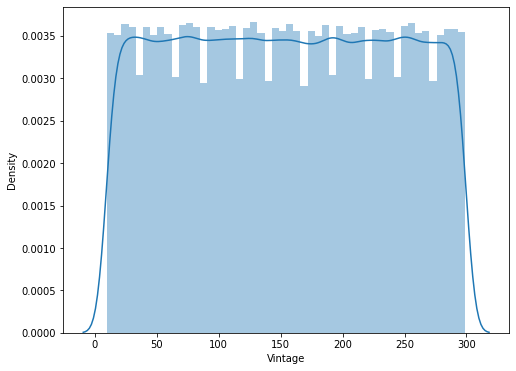

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Vintage'])

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

/home/arko/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


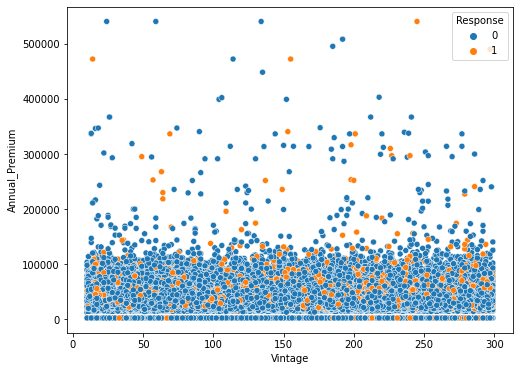

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Vintage', y='Annual_Premium', hue='Response', data=train_df)

Text(0.5, 1.0, 'Count of Positive Responses based on Region')

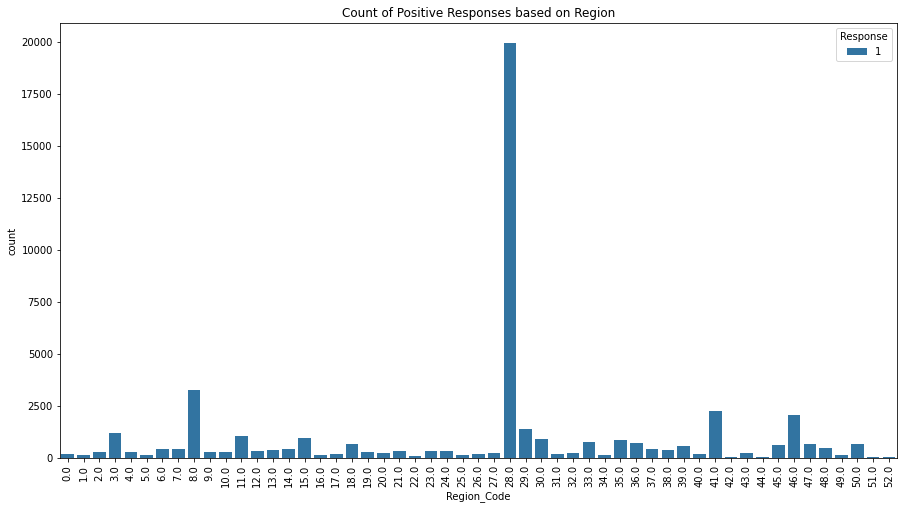

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='Region_Code',hue='Response', data=train_df[train_df['Response']==1])
plt.xticks(rotation=90)
plt.title("Count of Positive Responses based on Region")

In [31]:
train_df.groupby('Policy_Sales_Channel')['id'].count().reset_index().sort_values(by='id',ascending=True)

,Policy_Sales_Channel,id
80,84.0,1
142,149.0,1
136,143.0,1
118,123.0,1
137,144.0,1
...,...,...
149,156.0,10661
153,160.0,21779
119,124.0,73995
24,26.0,79700


Text(0.5, 1.0, 'Count of Positive Responses based on Region')

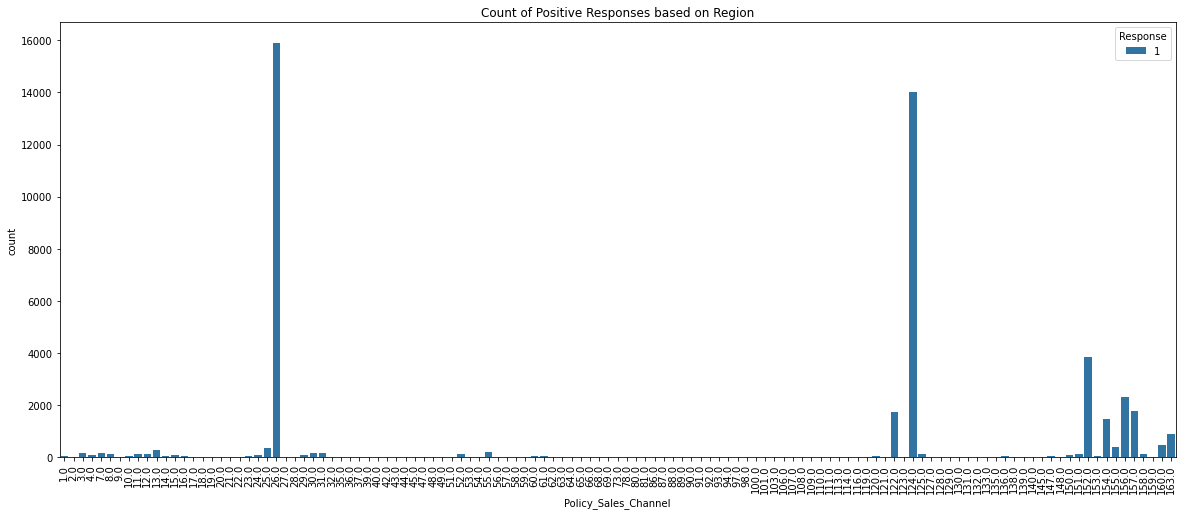

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x='Policy_Sales_Channel',hue='Response', data=train_df[train_df['Response']==1])
plt.xticks(rotation=90)
plt.title("Count of Positive Responses based on Region")

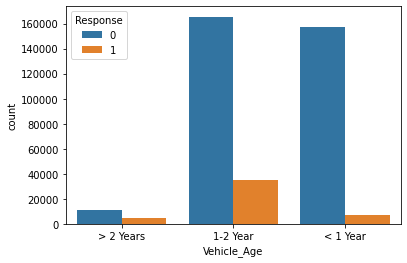

In [12]:
sns.countplot(x='Vehicle_Age',hue='Response',data=train_df)
plt.show()

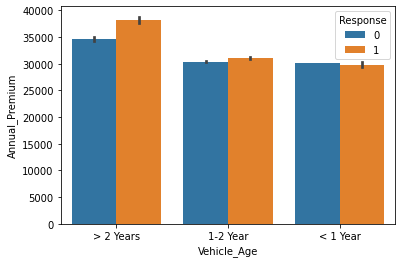

In [13]:
sns.barplot(x='Vehicle_Age',y='Annual_Premium',estimator=np.mean,hue='Response',data=train_df)
plt.show()

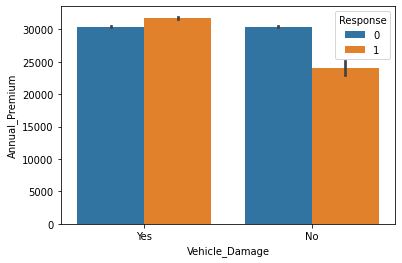

In [37]:
sns.barplot(x='Vehicle_Damage',y='Annual_Premium',estimator=np.mean,hue='Response',data=train_df)
plt.show()

### Approach 1 : Keeping categoricals as integers

In [38]:
#Convert to int
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].apply(lambda x: 0 if x=='< 1 Year' else(1 if x=='1-2 Year' else 2))
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0) 

In [45]:
#Convert to int
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].apply(lambda x: 0 if x=='< 1 Year' else(1 if x=='1-2 Year' else 2))
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].apply(lambda x: 1 if x=='Yes' else 0) 

In [100]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [101]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [102]:
train_cols = ['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']

cat_cols = ['Gender','Driving_License','Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel']

In [104]:
train_df['Region_Code'] = train_df['Region_Code'].astype(int)
train_df['Policy_Sales_Channel'] = train_df['Policy_Sales_Channel'].astype(int)

test_df['Region_Code'] = test_df['Region_Code'].astype(int)
test_df['Policy_Sales_Channel'] = test_df['Policy_Sales_Channel'].astype(int)

In [97]:
def evaluation(preds, proba):
    print(classification_report(y_test, preds))
    print('-----')
    print("ROC for Model is {}".format(roc_auc_score(y_test, proba)))
    print('-----')
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print((tn, fp, fn, tp))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('ROC CURVE')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True_Positive_Rate')
    plt.xlabel('False_Positive_Rate')
    plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

In [106]:
X = train_df[train_cols]
y = train_df['Response']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(304887, 10)
(76222, 10)
(304887,)


In [108]:
y_train.value_counts(), y_test.value_counts()

(0    267519
 1     37368
 Name: Response, dtype: int64,
 0    66880
 1     9342
 Name: Response, dtype: int64)

In [134]:
#Oversampling Approach
sm = SMOTENC(random_state=42, categorical_features=[0,2,3,4,5,6,8])
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

In [109]:
#Undersampling Approach
sm1 = RandomUnderSampler()
X_under_train, y_under_train = sm1.fit_resample(X_train, y_train)

In [117]:
X_under_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,41,1,0,0,22889.0,152,183
1,1,75,1,8,0,1,1,2630.0,156,160
2,0,42,1,45,0,1,1,2630.0,157,157
3,0,27,1,8,1,0,0,37256.0,152,29
4,0,28,1,46,1,0,0,48060.0,152,144
...,...,...,...,...,...,...,...,...,...,...
74731,1,53,1,8,0,2,1,2630.0,7,198
74732,1,67,1,46,0,1,1,31564.0,124,127
74733,1,30,1,15,0,1,1,39443.0,154,182
74734,1,49,1,41,0,1,1,39444.0,12,17


In [113]:
cat_m = CatBoostClassifier(eval_metric='AUC')
cat_m = cat_m.fit(X_under_train, y_under_train, cat_features=cat_cols, early_stopping_rounds=30, eval_set=(X_test, y_test)
                 , plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.091975
0:	test: 0.8344884	best: 0.8344884 (0)	total: 54.8ms	remaining: 54.8s
1:	test: 0.8374907	best: 0.8374907 (1)	total: 98.3ms	remaining: 49s
2:	test: 0.8380020	best: 0.8380020 (2)	total: 151ms	remaining: 50.2s
3:	test: 0.8381037	best: 0.8381037 (3)	total: 205ms	remaining: 51.1s
4:	test: 0.8391000	best: 0.8391000 (4)	total: 276ms	remaining: 55s
5:	test: 0.8394483	best: 0.8394483 (5)	total: 340ms	remaining: 56.3s
6:	test: 0.8394377	best: 0.8394483 (5)	total: 392ms	remaining: 55.6s
7:	test: 0.8422111	best: 0.8422111 (7)	total: 451ms	remaining: 55.9s
8:	test: 0.8436818	best: 0.8436818 (8)	total: 493ms	remaining: 54.3s
9:	test: 0.8458362	best: 0.8458362 (9)	total: 525ms	remaining: 52s
10:	test: 0.8470683	best: 0.8470683 (10)	total: 560ms	remaining: 50.3s
11:	test: 0.8482261	best: 0.8482261 (11)	total: 599ms	remaining: 49.3s
12:	test: 0.8491785	best: 0.8491785 (12)	total: 642ms	remaining: 48.7s
13:	test: 0.8496449	best: 0.8496449 (13)	total: 673ms	remaining: 47.4s


119:	test: 0.8572126	best: 0.8572126 (119)	total: 5.08s	remaining: 37.3s
120:	test: 0.8572032	best: 0.8572126 (119)	total: 5.13s	remaining: 37.2s
121:	test: 0.8572131	best: 0.8572131 (121)	total: 5.17s	remaining: 37.2s
122:	test: 0.8572238	best: 0.8572238 (122)	total: 5.22s	remaining: 37.2s
123:	test: 0.8572113	best: 0.8572238 (122)	total: 5.26s	remaining: 37.2s
124:	test: 0.8571921	best: 0.8572238 (122)	total: 5.32s	remaining: 37.2s
125:	test: 0.8571889	best: 0.8572238 (122)	total: 5.36s	remaining: 37.2s
126:	test: 0.8571954	best: 0.8572238 (122)	total: 5.4s	remaining: 37.1s
127:	test: 0.8571966	best: 0.8572238 (122)	total: 5.43s	remaining: 37s
128:	test: 0.8571934	best: 0.8572238 (122)	total: 5.47s	remaining: 37s
129:	test: 0.8571941	best: 0.8572238 (122)	total: 5.54s	remaining: 37s
130:	test: 0.8571975	best: 0.8572238 (122)	total: 5.6s	remaining: 37.1s
131:	test: 0.8572131	best: 0.8572238 (122)	total: 5.63s	remaining: 37s
132:	test: 0.8572272	best: 0.8572272 (132)	total: 5.67s	remai

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier(n_estimators=1000, random_state=123, n_jobs=10)
rf = rf.fit(X_under_train, y_under_train)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66880
           1       0.28      0.93      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222

-----
ROC for Model is 0.8573062162864318
-----
(44980, 21900, 662, 8680)


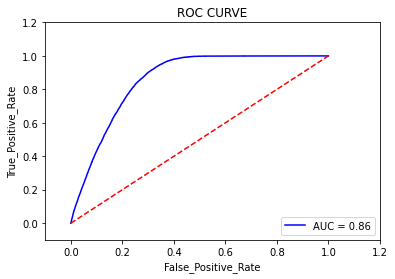

In [116]:
#CatBoost Evaluation Metrics
evaluation(cat_m.predict(X_test), cat_m.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66880
           1       0.28      0.89      0.43      9342

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.62     76222
weighted avg       0.89      0.71      0.76     76222

-----
ROC for Model is 0.8392324931125984
-----
(45738, 21142, 1069, 8273)


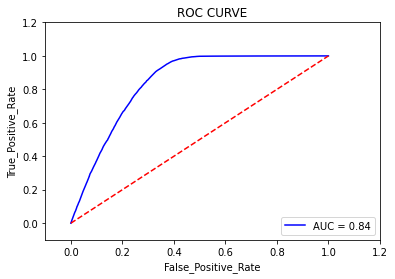

In [118]:
#RandomForest Evaluation Metrics
evaluation(rf.predict(X_test), rf.predict_proba(X_test)[:,1])

### Approach 2 : WOE Encoding for Region Code and Policy_Sales_Channel

In [40]:
df1 = train_df.copy()

In [41]:
df1.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0


In [42]:
df1.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [43]:
from category_encoders import WOEEncoder
enc = WOEEncoder(cols=['Region_Code','Policy_Sales_Channel'])
df1 = enc.fit_transform(df1.drop('Response',axis=1), df1['Response'])

/home/arko/.local/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [44]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,0.499831,0,2,1,40454.0,0.578246,217
1,2,1,76,1,0.047270,0,1,0,33536.0,0.578246,183
2,3,1,47,1,0.499831,0,2,1,38294.0,0.578246,27
3,4,1,21,1,-0.093676,1,0,0,28619.0,-1.555892,203
4,5,0,29,1,-0.006989,1,0,0,27496.0,-1.555892,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,-0.578859,1,1,0,30170.0,0.578246,88
381105,381106,1,30,1,-0.482034,1,0,0,40016.0,-1.555892,131
381106,381107,1,21,1,-0.560005,1,0,0,35118.0,-1.832939,161
381107,381108,0,68,1,-0.340608,0,2,1,44617.0,0.512838,74


In [45]:
df1 = pd.concat([df1, train_df['Response']], axis=1)

<AxesSubplot:>

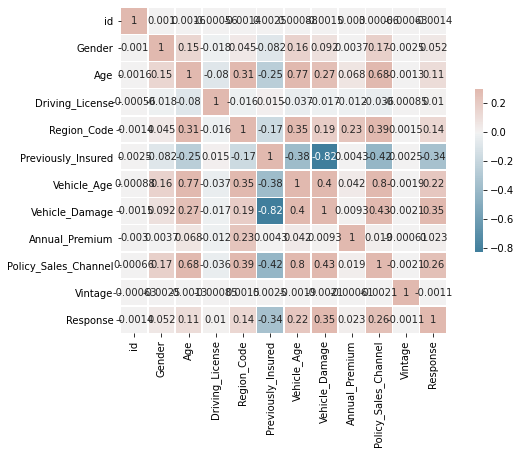

In [46]:
corr=df1.corr()
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
df1.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,1.091207,1,40454.0,26,217,1
1,2,1,76,1,3.0,0,0.409121,0,33536.0,26,183,0


In [49]:
X = df1.drop(['id','Response'], axis=1)
y = df1['Response']

In [50]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,0.499831,0,2,1,40454.0,0.578246,217
1,1,76,1,0.047270,0,1,0,33536.0,0.578246,183
2,1,47,1,0.499831,0,2,1,38294.0,0.578246,27
3,1,21,1,-0.093676,1,0,0,28619.0,-1.555892,203
4,0,29,1,-0.006989,1,0,0,27496.0,-1.555892,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,-0.578859,1,1,0,30170.0,0.578246,88
381105,1,30,1,-0.482034,1,0,0,40016.0,-1.555892,131
381106,1,21,1,-0.560005,1,0,0,35118.0,-1.832939,161
381107,0,68,1,-0.340608,0,2,1,44617.0,0.512838,74


In [51]:
X['Policy_Sales_Channel'] = X['Policy_Sales_Channel'].astype(float)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier as xgbclf
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.metrics import auc

In [59]:
#WOE Encoded Data with Interaction Effects to understand combined action of features
df_inter = pd.read_pickle('WOE_Encoded_with_Interaction')

In [60]:
df_inter

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_Under_1_Year,Vehicle_Age_Over_2_Years,Vehicle_Damage_Yes,Previously_Insured_Gender,Previously_Insured_Vehicle_Damage,Vehicle_Age_Under_1_Vehicle_Damage,Vehicle_Age_Over_2_Vehicle_Damage,Gender_Vehicle_Damage
0,44,0.499831,0,40454.0,0.578246,217,1,0,1,1,0,0,0,1,1
1,76,0.047270,0,33536.0,0.578246,183,1,0,0,0,0,0,0,0,0
2,47,0.499831,0,38294.0,0.578246,27,1,0,1,1,0,0,0,1,1
3,21,-0.093676,1,28619.0,-1.555892,203,1,1,0,0,1,0,0,0,0
4,29,-0.006989,1,27496.0,-1.555892,39,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,-0.578859,1,30170.0,0.578246,88,1,0,0,0,1,0,0,0,0
381105,30,-0.482034,1,40016.0,-1.555892,131,1,1,0,0,1,0,0,0,0
381106,21,-0.560005,1,35118.0,-1.832939,161,1,1,0,0,1,0,0,0,0
381107,68,-0.340608,0,44617.0,0.512838,74,0,0,1,1,0,0,0,1,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(304887, 10)
(76222, 10)
(304887,)


In [88]:
print(y_train.value_counts())
y_test.value_counts()

0    267519
1     37368
Name: Response, dtype: int64


0    66880
1     9342
Name: Response, dtype: int64

In [89]:
sm1 = RandomUnderSampler()
X_under_train, y_under_train = sm1.fit_resample(X_train, y_train)

In [90]:
X_under_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [91]:
X_under_train.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,70,1,-0.253430,1,1,0,2630.0,0.578246,119
1,1,56,1,-0.006989,0,1,1,45624.0,0.378644,18


In [92]:
cat_cols = ['Gender','Driving_License','Previously_Insured',
            'Vehicle_Age', 'Vehicle_Damage']

In [93]:
cat_m = CatBoostClassifier(eval_metric='AUC')
cat_m = cat_m.fit(X_under_train, y_under_train, cat_features=cat_cols, early_stopping_rounds=30, eval_set=(X_test, y_test)
                 , plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.091975
0:	test: 0.8410321	best: 0.8410321 (0)	total: 35.9ms	remaining: 35.8s
1:	test: 0.8482832	best: 0.8482832 (1)	total: 76.8ms	remaining: 38.3s
2:	test: 0.8485165	best: 0.8485165 (2)	total: 109ms	remaining: 36.1s
3:	test: 0.8485172	best: 0.8485172 (3)	total: 156ms	remaining: 38.8s
4:	test: 0.8500088	best: 0.8500088 (4)	total: 194ms	remaining: 38.5s
5:	test: 0.8498516	best: 0.8500088 (4)	total: 222ms	remaining: 36.7s
6:	test: 0.8498516	best: 0.8500088 (4)	total: 246ms	remaining: 34.9s
7:	test: 0.8500405	best: 0.8500405 (7)	total: 269ms	remaining: 33.4s
8:	test: 0.8504203	best: 0.8504203 (8)	total: 294ms	remaining: 32.4s
9:	test: 0.8505368	best: 0.8505368 (9)	total: 317ms	remaining: 31.4s
10:	test: 0.8505594	best: 0.8505594 (10)	total: 343ms	remaining: 30.9s
11:	test: 0.8507522	best: 0.8507522 (11)	total: 367ms	remaining: 30.2s
12:	test: 0.8509152	best: 0.8509152 (12)	total: 398ms	remaining: 30.2s
13:	test: 0.8510469	best: 0.8510469 (13)	total: 430ms	remaining: 

120:	test: 0.8570488	best: 0.8570488 (120)	total: 3.49s	remaining: 25.4s
121:	test: 0.8570822	best: 0.8570822 (121)	total: 3.52s	remaining: 25.3s
122:	test: 0.8570223	best: 0.8570822 (121)	total: 3.57s	remaining: 25.5s
123:	test: 0.8570186	best: 0.8570822 (121)	total: 3.64s	remaining: 25.7s
124:	test: 0.8570038	best: 0.8570822 (121)	total: 3.7s	remaining: 25.9s
125:	test: 0.8569760	best: 0.8570822 (121)	total: 3.73s	remaining: 25.9s
126:	test: 0.8569942	best: 0.8570822 (121)	total: 3.77s	remaining: 25.9s
127:	test: 0.8569915	best: 0.8570822 (121)	total: 3.8s	remaining: 25.9s
128:	test: 0.8570197	best: 0.8570822 (121)	total: 3.83s	remaining: 25.9s
129:	test: 0.8570303	best: 0.8570822 (121)	total: 3.86s	remaining: 25.9s
130:	test: 0.8570242	best: 0.8570822 (121)	total: 3.9s	remaining: 25.9s
131:	test: 0.8569971	best: 0.8570822 (121)	total: 3.93s	remaining: 25.9s
132:	test: 0.8570092	best: 0.8570822 (121)	total: 3.97s	remaining: 25.9s
133:	test: 0.8570092	best: 0.8570822 (121)	total: 4s	r

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66880
           1       0.28      0.93      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222

-----
ROC for Model is 0.8570822484939652
-----
(44884, 21996, 651, 8691)


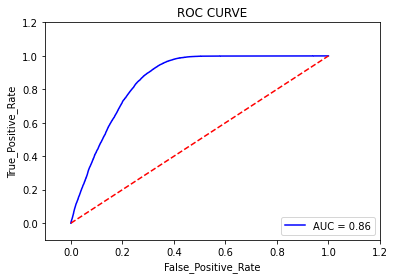

In [98]:
evaluation(cat_m.predict(X_test), cat_m.predict_proba(X_test)[:,1])

In [65]:
#Attempting Bayesian Optimization instead of GridSearchCV to find optimal parameters for XGB
def bayes_parameter_opt_xgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6):
    # prepare data
    train_data = xgb.DMatrix(data=X, label=y)
    # parameters
    def xgb_eval(learning_rate, gamma, max_depth, max_delta_step, reg_lambda, subsample, n_estimators):
        
        params = {'objective':'binary:logistic', 'eval_metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params['gamma'] = max(min(gamma, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_delta_step'] = max_delta_step
        params['reg_lambda'] = reg_lambda
        params['subsample'] = max(min(subsample, 1), 0)
        params['n_estimators'] = int(n_estimators)
        
        cv_result = xgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True,
                           verbose_eval =200, metrics=['auc'])
        
        return max(cv_result['test-auc-mean'])
     
    xgbBO = BayesianOptimization(xgb_eval, {'learning_rate': (0.01, 1.0),
                                            'gamma': (0, 1),
                                            'max_depth': (3, 20),
                                            'max_delta_step': (0, 1),
                                            'reg_lambda':(0,1),
                                            'subsample':(0.01, 1),
                                            'n_estimators': (200, 2000)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    xgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # return best parameters
    return xgbBO.max['params']

opt_params = bayes_parameter_opt_xgb(X_under_train, y_under_train, init_round=50, opt_round=300, n_folds=3, random_seed=6)

|   iter    |  target   |   gamma   | learni... | max_de... | max_depth | n_esti... | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
[21:52:44] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:44] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:52:44] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83351+0.00129	test-auc:0.83128+0.00225
[9]	train-auc:0.85677+0.00091	test-auc:0.84817+0.00296
|  7        |  0.8484   |  0.666    |  0.5222   |  0.8545   |  5.907    |  1.961e+0 |  0.3013   |  0.2401   |
[21:53:01] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:02] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:02] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79241+0.00121	test-auc:0.79144+0.00177
[9]	train-auc:0.82568+0.00293	test-auc:0.82470+0.00115
|  14       |  0.8247   |  0.3888   |  0.01544  |  0.1588   |  16.03    |  1.13e+03 |  0.6786   |  0.07783  |
[21:53:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83908+0.00104	test-auc:0.81892+0.00342
[9]	train-auc:0.91040+0.00159	test-auc:0.84333+0.00108
|  21       |  0.8448   |  0.8991   |  0.4391   |  0.9412   |  12.23    |  1.878e+0 |  0.4595   |  0.7499   |
[21:53:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79077+0.00087	test-auc:0.79072+0.00236
[9]	train-auc:0.82090+0.00325	test-auc:0.82089+0.00149
|  28       |  0.8209   |  0.9243   |  0.4224   |  0.06687  |  3.349    |  1.718e+0 |  0.9189   |  0.06617  |
[21:53:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:53:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79820+0.00034	test-auc:0.79541+0.00199
[9]	train-auc:0.85097+0.00078	test-auc:0.82605+0.00072
|  35       |  0.8302   |  0.3021   |  0.9019   |  0.5028   |  17.33    |  676.4    |  0.6194   |  0.09534  |
[21:54:04] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:04] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:04] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83621+0.00180	test-auc:0.83380+0.00254
[9]	train-auc:0.85278+0.00077	test-auc:0.84884+0.00293
|  42       |  0.8488   |  0.9967   |  0.05395  |  0.896    |  6.504    |  1.526e+0 |  0.5398   |  0.5147   |
[21:54:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82788+0.00073	test-auc:0.80281+0.00115
[9]	train-auc:0.94764+0.00075	test-auc:0.82416+0.00321
|  49       |  0.8298   |  0.3774   |  0.8459   |  0.7535   |  16.01    |  737.8    |  0.9413   |  0.6692   |
[21:54:38] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:38] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:38] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.81984+0.00355	test-auc:0.81898+0.00591
[9]	train-auc:0.85675+0.00136	test-auc:0.85150+0.00295
|  56       |  0.8515   |  0.7621   |  0.9037   |  0.5491   |  3.584    |  1.312e+0 |  0.8899   |  0.7424   |
[21:54:54] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:54] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:54] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.82953+0.00087	test-auc:0.82863+0.00317
|  63       |  0.8286   |  0.2698   |  0.1821   |  0.07319  |  4.927    |  574.1    |  0.5257   |  0.01506  |
[21:55:10] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:10] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[9]	train-auc:0.85673+0.00114	test-auc:0.85157+0.00197
|  70       |  0.8516   |  0.6424   |  0.9806   |  0.3444   |  3.964    |  1.749e+0 |  0.8198   |  0.8376   |
[21:55:27] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:27] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:27] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.82067+0.00143	test-auc:0.79700+0.00151
[9]	train-auc:0.96543+0.00116	test-auc:0.83243+0.00182
|  77       |  0.8351   |  0.06551  |  0.728    |  0.5345   |  18.69    |  1.797e+0 |  0.6763   |  0.8568   |
[21:55:47] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:47] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:47] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80106+0.00132	test-auc:0.79577+0.00042
[9]	train-auc:0.88532+0.00254	test-auc:0.83395+0.00220
|  84       |  0.8359   |  0.1096   |  0.857    |  0.3617   |  16.67    |  1.69e+03 |  0.03003  |  0.2711   |
[21:56:03] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:03] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:03] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.85535+0.00095	test-auc:0.85195+0.00223
|  91       |  0.852    |  0.6386   |  0.7957   |  0.4785   |  3.734    |  1.733e+0 |  0.07138  |  0.3853   |
[21:56:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.82177+0.00379	test-auc:0.82068+0.00521
[9]	train-auc:0.85735+0.00107	test-auc:0.85207+0.00259
|  98       |  0.8521   |  0.3455   |  0.5884   |  0.5426   |  5.078    |  1.599e+0 |  0.0363   |  0.4426   |
[21:56:39] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:39] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:39] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82170+0.00174	test-auc:0.82075+0.00366
[9]	train-auc:0.85335+0.00054	test-auc:0.84939+0.00267
|  105      |  0.8498   |  0.8087   |  0.419    |  0.6909   |  4.988    |  1.598e+0 |  0.6221   |  0.1376   |
[21:56:56] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:56] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:56:56] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80295+0.00505	test-auc:0.80202+0.00367
[9]	train-auc:0.84257+0.00067	test-auc:0.84184+0.00569
|  112      |  0.8418   |  0.4603   |  0.2386   |  0.3468   |  5.446    |  1.947e+0 |  0.4353   |  0.2126   |
[21:57:14] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:14] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:14] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79705+0.00070	test-auc:0.79348+0.00214
[9]	train-auc:0.86952+0.00032	test-auc:0.82849+0.00189
|  119      |  0.8317   |  0.5826   |  0.8862   |  0.4599   |  17.44    |  1.104e+0 |  0.3579   |  0.1774   |
[21:57:34] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:34] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:34] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79738+0.00230	test-auc:0.79673+0.00344
[9]	train-auc:0.85214+0.00121	test-auc:0.84865+0.00289
|  126      |  0.8486   |  0.7044   |  0.8825   |  0.1665   |  4.543    |  1.947e+0 |  0.4571   |  0.4022   |
[21:57:52] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:52] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:52] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82203+0.00174	test-auc:0.79526+0.00105
[9]	train-auc:0.95219+0.00122	test-auc:0.83886+0.00110
|  133      |  0.8389   |  0.7061   |  0.4292   |  0.5566   |  17.98    |  1.255e+0 |  0.4651   |  0.9255   |
[21:58:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80304+0.00108	test-auc:0.79447+0.00185
[9]	train-auc:0.84365+0.00175	test-auc:0.83147+0.00272
|  140      |  0.8315   |  0.3506   |  0.2617   |  0.2438   |  17.78    |  247.7    |  0.4577   |  0.564    |
[21:58:31] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:31] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:31] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82174+0.00096	test-auc:0.82087+0.00274
[9]	train-auc:0.85665+0.00116	test-auc:0.85199+0.00348
|  147      |  0.8521   |  0.1443   |  0.703    |  0.7124   |  3.558    |  1.161e+0 |  0.7757   |  0.9675   |
[21:58:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:58:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.83684+0.00251	test-auc:0.83579+0.00164
|  154      |  0.8358   |  0.009014 |  0.04032  |  0.8187   |  4.223    |  1.745e+0 |  0.4687   |  0.7473   |
[21:59:06] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:06] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:06] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.78920+0.00045	test-auc:0.78842+0.00163
[9]	train-auc:0.83651+0.00141	test-auc:0.83589+0.00385
|  161      |  0.8359   |  0.4484   |  0.8287   |  0.08957  |  3.417    |  983.8    |  0.9008   |  0.154    |
[21:59:24] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:24] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:24] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80819+0.00378	test-auc:0.80652+0.00590
[9]	train-auc:0.85361+0.00124	test-auc:0.84997+0.00252
|  168      |  0.85     |  0.3079   |  0.6751   |  0.2117   |  5.235    |  1.746e+0 |  0.4308   |  0.8075   |
[21:59:42] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:42] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:42] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82305+0.00055	test-auc:0.82173+0.00222
[9]	train-auc:0.85986+0.00120	test-auc:0.85114+0.00269
|  175      |  0.8517   |  0.6758   |  0.8451   |  0.6771   |  5.141    |  953.2    |  0.1669   |  0.6608   |
[22:00:00] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:00] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:00] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79418+0.00234	test-auc:0.79356+0.00223
[9]	train-auc:0.81689+0.00033	test-auc:0.81619+0.00382
|  182      |  0.8162   |  0.3026   |  0.4603   |  0.05803  |  4.876    |  1.318e+0 |  0.1906   |  0.9927   |
[22:00:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:17] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80871+0.00127	test-auc:0.79391+0.00067
[9]	train-auc:0.92876+0.00427	test-auc:0.83042+0.00112
|  189      |  0.8333   |  0.3638   |  0.8601   |  0.468    |  17.11    |  604.4    |  0.7624   |  0.5847   |
[22:00:37] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:37] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:37] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.80327+0.00246	test-auc:0.79534+0.00218
[9]	train-auc:0.90235+0.00294	test-auc:0.84358+0.00225
|  196      |  0.8436   |  0.901    |  0.7509   |  0.2444   |  14.67    |  1.576e+0 |  0.8427   |  0.7646   |
[22:00:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:00:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83065+0.00079	test-auc:0.82877+0.00332
[9]	train-auc:0.86002+0.00093	test-auc:0.85318+0.00276
|  203      |  0.8532   |  0.8224   |  0.3655   |  0.7747   |  6.318    |  1.746e+0 |  0.4498   |  0.7971   |
[22:01:13] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:13] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:13] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.83500+0.00211	test-auc:0.83423+0.00166
|  210      |  0.8342   |  0.8795   |  0.02253  |  0.9577   |  3.752    |  1.318e+0 |  0.7034   |  0.9242   |
[22:01:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.83213+0.00118	test-auc:0.83011+0.00254
[9]	train-auc:0.86670+0.00155	test-auc:0.84930+0.00325
|  217      |  0.8518   |  0.9851   |  0.9202   |  0.8527   |  5.656    |  1.746e+0 |  0.7682   |  0.8784   |
[22:01:51] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:52] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:01:52] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82918+0.00149	test-auc:0.82825+0.00279
[9]	train-auc:0.85530+0.00080	test-auc:0.85219+0.00343
|  224      |  0.8522   |  0.6767   |  0.4025   |  0.9868   |  3.803    |  1.598e+0 |  0.5425   |  0.9325   |
[22:02:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:11] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83559+0.00092	test-auc:0.83189+0.00240
[9]	train-auc:0.86946+0.00064	test-auc:0.84567+0.00266
|  231      |  0.8489   |  0.8072   |  0.8357   |  0.8919   |  7.11     |  1.598e+0 |  0.3377   |  0.696    |
[22:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.81496+0.00100	test-auc:0.81438+0.00264
[9]	train-auc:0.85491+0.00101	test-auc:0.85121+0.00308
|  238      |  0.8513   |  0.3005   |  0.8383   |  0.9174   |  3.041    |  1.598e+0 |  0.3567   |  0.6543   |
[22:02:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.81552+0.00029	test-auc:0.81505+0.00208
[9]	train-auc:0.85430+0.00165	test-auc:0.85183+0.00187
|  245      |  0.8518   |  1.0      |  0.6889   |  1.0      |  3.0      |  1.166e+0 |  0.1536   |  1.0      |
[22:03:10] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:10] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:10] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83644+0.00287	test-auc:0.83468+0.00059
[9]	train-auc:0.86128+0.00115	test-auc:0.84656+0.00296
|  252      |  0.8502   |  0.2298   |  0.7337   |  0.9136   |  5.614    |  272.9    |  0.7121   |  0.4037   |
[22:03:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82965+0.00049	test-auc:0.82835+0.00263
[9]	train-auc:0.85359+0.00182	test-auc:0.84300+0.00288
|  259      |  0.8466   |  0.4622   |  1.0      |  0.8446   |  4.619    |  953.8    |  0.4474   |  0.3046   |
[22:03:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:03:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.85537+0.00080	test-auc:0.84506+0.00262
|  266      |  0.8478   |  0.1683   |  0.9646   |  0.9794   |  4.729    |  1.747e+0 |  0.4061   |  0.3139   |
[22:04:09] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:09] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:09] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.82361+0.00435	test-auc:0.82144+0.00203
[9]	train-auc:0.85961+0.00138	test-auc:0.85021+0.00244
|  273      |  0.8505   |  0.744    |  0.6352   |  0.6277   |  5.92     |  272.2    |  0.1848   |  0.3999   |
[22:04:29] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:29] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:29] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.85185+0.00089	test-auc:0.85044+0.00295
|  280      |  0.8504   |  0.4637   |  0.456    |  0.6462   |  3.267    |  569.1    |  0.6139   |  0.5573   |
[22:04:51] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:51] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:51] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.83687+0.00256	test-auc:0.83439+0.00310
[9]	train-auc:0.86838+0.00040	test-auc:0.84950+0.00349
|  287      |  0.8511   |  0.647    |  0.823    |  0.9809   |  5.827    |  1.6e+03  |  0.5116   |  0.9289   |
[22:05:12] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:12] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:12] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83406+0.00178	test-auc:0.83178+0.00143
[9]	train-auc:0.86367+0.00115	test-auc:0.85249+0.00387
|  294      |  0.8529   |  0.7748   |  0.5628   |  0.8736   |  6.23     |  271.8    |  0.6566   |  0.8613   |
[22:05:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:33] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.79540+0.00148	test-auc:0.79436+0.00153
[9]	train-auc:0.81587+0.00160	test-auc:0.81408+0.00130
|  301      |  0.8141   |  0.9096   |  0.1605   |  0.07712  |  6.548    |  272.8    |  0.106    |  0.6569   |
[22:05:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.85289+0.00145	test-auc:0.85007+0.00248
|  308      |  0.8501   |  0.4964   |  0.5061   |  0.8137   |  4.261    |  952.8    |  0.2908   |  0.142    |
[22:06:16] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:06:16] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:06:16] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.80248+0.00268	test-auc:0.79904+0.00400
[9]	train-auc:0.82578+0.00072	test-auc:0.82145+0.00253
|  315      |  0.8215   |  0.9161   |  0.1329   |  0.231    |  7.605    |  373.3    |  0.2258   |  0.8294   |
[22:06:41] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:06:41] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:06:41] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.82008+0.00236	test-auc:0.81941+0.00429
[9]	train-auc:0.85714+0.00161	test-auc:0.85225+0.00190
|  322      |  0.8523   |  0.8423   |  0.8943   |  0.4766   |  4.419    |  954.6    |  0.2073   |  0.9713   |
[22:07:07] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:07] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:07] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83161+0.00116	test-auc:0.82980+0.00250
[9]	train-auc:0.86181+0.00051	test-auc:0.85224+0.00251
|  329      |  0.8526   |  0.4628   |  0.7787   |  0.9014   |  5.31     |  1.733e+0 |  0.1638   |  0.9996   |
[22:07:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:30] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[9]	train-auc:0.85015+0.00236	test-auc:0.84759+0.00142
|  336      |  0.8479   |  0.4682   |  0.9661   |  0.7479   |  3.284    |  1.312e+0 |  0.526    |  0.1747   |
[22:07:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:55] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[0]	train-auc:0.79898+0.00211	test-auc:0.79623+0.00071
[9]	train-auc:0.85478+0.00144	test-auc:0.84175+0.00225
|  343      |  0.8422   |  0.3282   |  0.6124   |  0.4374   |  8.084    |  1.599e+0 |  0.7103   |  0.1427   |
[22:08:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:21] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:08:22] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accur

[0]	train-auc:0.83667+0.00068	test-auc:0.83433+0.00348
[9]	train-auc:0.85445+0.00132	test-auc:0.85152+0.00235
|  350      |  0.8515   |  0.957    |  0.1369   |  0.9932   |  5.83     |  1.747e+0 |  0.1269   |  0.3214   |


In [66]:
opt_params

{'gamma': 0.9268988085898052,
 'learning_rate': 0.5334996511511917,
 'max_delta_step': 0.7807584893928095,
 'max_depth': 4.932922576151364,
 'n_estimators': 1598.7830916291498,
 'reg_lambda': 0.25984974225973,
 'subsample': 0.7847882586250635}

In [67]:
opt_params['max_depth']= int(opt_params['max_depth'])
opt_params['n_estimators']= int(opt_params['n_estimators'])

In [68]:
xgb = xgbclf(**opt_params).fit(X_under_train, y_under_train)
xgb_preds = xgb.predict(X_test)

In [70]:
xgb_preds = xgb_preds.astype(int)
y_test = y_test.astype(int)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66880
           1       0.28      0.85      0.42      9342

    accuracy                           0.72     76222
   macro avg       0.63      0.77      0.62     76222
weighted avg       0.89      0.72      0.76     76222

-----
ROC for Model is 0.7908623858373821
-----
(46608, 20272, 1403, 7939)


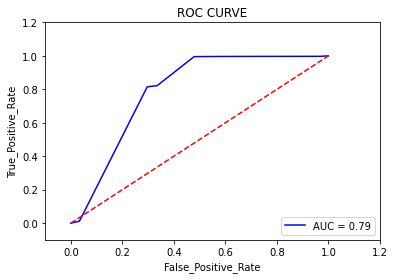

In [99]:
evaluation(xgb_preds, xgb.predict_proba(X_test)[:,1])